In [1]:
import pandas as pd
import numpy as np
import scipy.optimize
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

df = pd.read_csv('../Kapitel1/data/EELS-Overview-FeCr_2.csv')

Der ZLP liegt bei -0.195 eV.


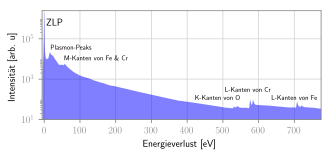

In [2]:
def plot_EELS(data_frame, is_log_scale=True):
    
    print('Der ZLP liegt bei %.3f eV.' % data_frame.X[np.argmax(data_frame.Y)])
    # Shift 0eV to where the intensity is the highest:
    x_offset = data_frame.X[np.argmax(data_frame.Y)]
    data_frame.X = data_frame.X - x_offset
    plt.figure(figsize=(5,2))
    plt.fill_between(data_frame.X, 0, data_frame.Y, facecolor='blue', alpha=0.5)
    plt.xlabel('Energieverlust [eV]')
    plt.ylabel('Intensität [arb. u]')
    if is_log_scale:
        plt.yscale('log')
        plt.xlim(-6, data_frame.X.max())
    else:
        plt.xlim(-5, 45)
    if is_log_scale:
        plt.ylim(1e1, round(1.2 * data_frame.Y.max()))
    
    if is_log_scale:
        fs = 10
        plt.text(5,
                 1e6,
                 'ZLP',
                 verticalalignment='top',
                 horizontalalignment='left',
                 fontsize=fs
                ) 
        fs = 7
        plt.text(17,
                 2.5e4,
                 'Plasmon-Peaks',
                 verticalalignment='bottom',
                 horizontalalignment='left',
                 fontsize=fs
                )    
        plt.text(55,
                 0.15e5,
                 'M-Kanten von Fe \& Cr',
                 verticalalignment='top',
                 horizontalalignment='left',
                 fontsize=fs
                )    
        plt.text(565,
                 80,
                 'K-Kanten von O',
                 verticalalignment='bottom',
                 horizontalalignment='right',
                 fontsize=fs
                )    
        plt.text(578,
                 200,
                 'L-Kanten von Cr',
                 verticalalignment='bottom',
                 horizontalalignment='center',
                 fontsize=fs
                )    
        plt.text(708,
                 80,
                 'L-Kanten von Fe',
                 verticalalignment='bottom',
                 horizontalalignment='center',
                 fontsize=fs
                )    
        plt.xticks(range(0, 751, 100))
    else:
        plt.xticks(range(-5, 46, 5))
    if is_log_scale:
        plt.savefig('Bilder/EELS_Overview_log')
    else:
        plt.savefig('Bilder/EELS_Overview')
    plt.show()

plot_EELS(df)

Der ZLP liegt bei 0.000 eV.


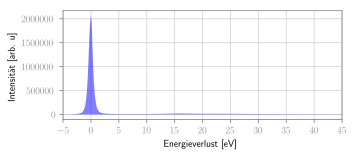

In [3]:
plot_EELS(df, is_log_scale=False)


    Intensität des ZLP: 23172800
    Intensität der Auswahl: 13305
    Verhältnis: 1742
    


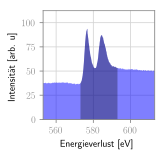

In [4]:
def plot_ESI_selection(data_frame, start, stop):
    assert start < stop
    width = stop - start
    x_offset = data_frame.X[np.argmax(data_frame.Y)]
    data_frame.X = data_frame.X - x_offset
    data_frame_selection = data_frame.loc[data_frame.X > start].loc[data_frame.X < stop]
    
    selection_sum = data_frame_selection.Y.sum()
    zlp_sum = data_frame.loc[data_frame.X > (-width / 2)].loc[data_frame.X < (width / 2)].Y.sum()
    
    output_str = """
    Intensität des ZLP: {:.0f}
    Intensität der Auswahl: {:.0f}
    Verhältnis: {:.0f}
    """
    print(output_str.format(float(zlp_sum), float(selection_sum), float(zlp_sum / selection_sum)))
    
    plt.figure(figsize=(2,2))
    plt.fill_between(data_frame.X, 0, data_frame.Y, facecolor='blue', alpha=0.5)
    plt.fill_between(data_frame_selection.X, 0, data_frame_selection.Y, facecolor='black', alpha=0.3)
    plt.xlabel('Energieverlust [eV]')
    plt.ylabel('Intensität [arb. u]')
    plt.xlim(start - width, stop + width) 
    plt.ylim(0, 1.2 * data_frame_selection.Y.max())
    plt.savefig('Bilder/EELS_Window_{:d}eV-{:d}eV'.format(start, stop))
    plt.show()

plot_ESI_selection(df, 573, 593)